In [ ]:
!pip install numpy
!pip install opencv-python
!pip install matplotlib

In [46]:
import numpy as np

def kernelSize(tam):
        return int((tam -1)/2 )
    
def convolucao(imagem:np.ndarray, filtro:np.ndarray, borda:str="ignore"):


    """
    Ex 3x3:
        Kernel[[, , , ] ,[, , ,], [, , , ]]
        Filtro [[1,2,3],[1,2,3],[1,2,3]]
    """
    m,n = filtro.shape
    
    new_image = np.zeros(imagem.shape)
        
        
    match borda:
        case "ignore":
            image_aux = imagem
        
        case "espelho":
            start_line = 0
            last_line = -1
            for _ in range(kernelSize(m)):
                image_aux = np.vstack([imagem[start_line],imagem,imagem[last_line]])
                image_aux = np.column_stack((image_aux[:,start_line],image_aux,image_aux[:,last_line])) 
                start_line +=2 
                last_line = last_line -2
        case "zero":
            
            for _ in range(kernelSize(m)):# for para saber quantas vezes será preciso interagir com a matriz até tratar as bordas
                zeros_c = np.zeros(imagem.shape[0]) #adicionando uma coluna com a quantidade de linhas que precisam ser adicionadas na matriz
                image_aux = np.column_stack((zeros_c,imagem,zeros_c)) #adicionando uma coluna adequada no lado esquerdo e direito da matriz
                zeros_l = np.zeros(image_aux.shape[1]) # Linhas contendo a quantidade de colunas para serem adicionadas
                image_aux = np.vstack([zeros_l,image_aux,zeros_l]) # adiciona as linhas em baixo e em cima da matriz
                
            
        case "replicar":
            start_line = 0
            last_line = -1
            for i in range(kernelSize(m)):
                print("\n\n",i)
                image_aux = np.vstack([imagem[start_line],imagem,imagem[last_line]])
                image_aux = np.column_stack((image_aux[:,start_line],image_aux,image_aux[:,last_line])) 
                start_line +=1
                last_line = last_line -1
        
        case _:
            raise ValueError("Borda Invalida")

    
    linha,coluna = image_aux.shape[0:2]
    print("\n\nOriginal Shape -> ",imagem.shape)
    print("\n\nAux Shape -> ",image_aux.shape)
    
    for l in range(0,linha,1):
        for c in range(0,coluna,1):
            
            if (l + m < linha and c + n < coluna) and (l > kernelSize(m) and c > kernelSize(n)): #só pega os valores que não afeta as bordas
                #print("\n\nL & C ->",l,c)
                new_image[l][c] = sum([sum(valor) for valor in (filtro * image_aux[l:l+m,c:c+n])])/(m*n) #média
            
                
    
    
    return new_image

In [47]:
import cv2
imagem = cv2.imread('teste_2.jpg')
imagem = cv2.cvtColor(imagem,cv2.COLOR_BGR2GRAY)

filtro = np.array([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

#convolucao(imagem,filtro,'zero')
cv2.imwrite('teste4.jpg',convolucao(imagem,filtro,'espelho'))




Original Shape ->  (1176, 1103)


Aux Shape ->  (1178, 1105)


True

# Questão 2
Crie uma função para aplicar filtros não-lineares, os filtros possíveis deverão ser o seguinte:
    Mediana
    Moda
    Máximo
    Mínimo
    

# Informações Uteis

`cv2.dilate(image, kernel)`
Dilate é uma operação de morfologia matemática que expande as regiões brilhantes na imag

`cv2.erode(image, kernel)`
erode é uma operação de morfologia matemática que reduz as regiões brilhantes na imagem.


In [ ]:
import cv2
import numpy as np

def apply_non_linear_filter(image, filter_type, kernel_size):
    # Verificar se a imagem é colorida
    is_color_image = len(image.shape) == 3
    
    # Converter a imagem para tons de cinza se for colorida
    if is_color_image:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Aplicar o filtro selecionado
    if filter_type == 'mediana':
        result = cv2.medianBlur(image, kernel_size)
    elif filter_type == 'moda':
        # OpenCV não possui função direta para moda, então usamos a abordagem de suavização média
        result = cv2.blur(image, (kernel_size, kernel_size))
    elif filter_type == 'maximo':
        result = cv2.dilate(image, np.ones((kernel_size, kernel_size), np.uint8))
    elif filter_type == 'minimo':
        result = cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))
    else:
        raise ValueError("Tipo de filtro não reconhecido. Escolha entre 'mediana', 'moda', 'maximo' ou 'minimo'.")
    
    return result


# Questão 3
Utilizando o algoritmo da questão 1, aplique o filtro Laplaciano em uma imagem em tons decinza. Utilize o filtro para realçar a imagem utilizada. O que aconteceu com a imagem apósa aplicação do realce?

# Questão 4
Implemente uma máscara de nitidez e uma filtragem high-boost utilizando o algoritmo daquestão 1. Explique os passos de ambas implementações e diferencie o resultado dasmesmas. Utilize pelo menos 3 valores de k no intervalor 0 < k < 2.

# Questão 5

Aplique os filtros da média e mediana em uma imagem ruidosa, o que aconteceu? Qual tipode ruído existia na imagem?

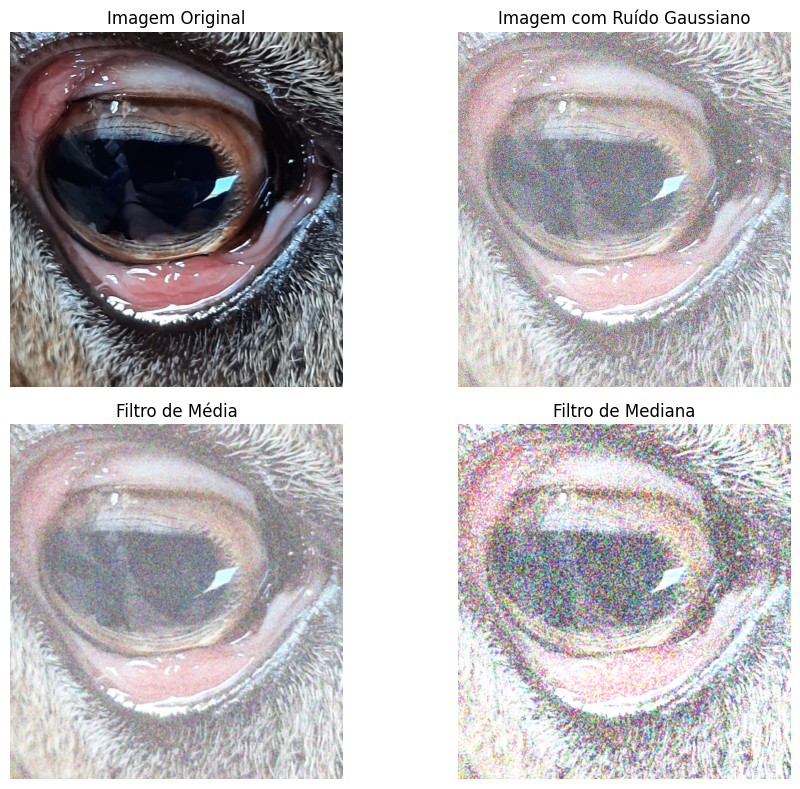

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
image = cv2.imread('teste_2.jpg')  # Substitua pelo caminho da sua imagem
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converter para o formato RGB para exibição

# Adicionar ruído gaussiano à imagem
mean = 0
std_dev = 50
noise = np.random.normal(mean, std_dev, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)

# Aplicar filtro de média
filtered_mean = cv2.blur(noisy_image, (5, 5))  # Usando um kernel de 5x5

# Aplicar filtro de mediana
filtered_median = cv2.medianBlur(noisy_image, 5)  # Usando um kernel de 5x5

# Exibir as imagens
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(noisy_image)
plt.title('Imagem com Ruído Gaussiano')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(filtered_mean)
plt.title('Filtro de Média')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(filtered_median)
plt.title('Filtro de Mediana')
plt.axis('off')

plt.tight_layout()
plt.show()
